In [1]:
# Cascade Hadamard Gates
#Demonstrates the behaviour of a cascade of Hadamard gates in accordance with 
#the invertibility of adjoint matrix that models the Hadamard gate.
%matplotlib inline
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
provider = IBMQ.load_account()


Bad key "text.kerning_factor" on line 4 in
E:\DevelopmentEnvironments\Anaconda3\envs\qiskit_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
q = QuantumRegister(5, 'q')
c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(q, c)

circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[1])
circuit.x(q[2])
circuit.x(q[3])
circuit.h(q[3])
circuit.x(q[4])
circuit.h(q[4])
circuit.h(q[4])

circuit.measure(q, c)

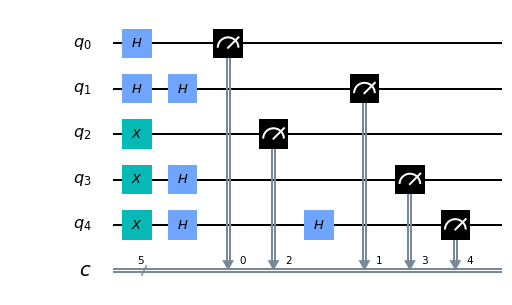

In [3]:
%matplotlib inline
circuit.draw(output="mpl")

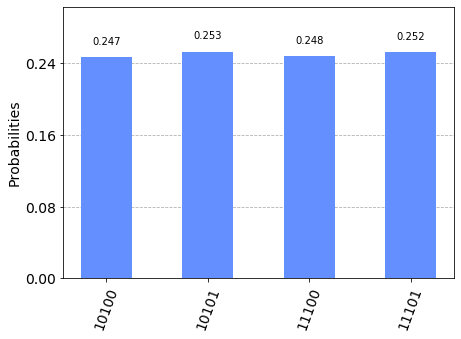

In [4]:
#backend = IBMQ.get_provider().get_backend('ibmq_london') 
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=backend, shots=8192)
result = job.result()

counts = result.get_counts(circuit)
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)